---
jupyter: python3
---

**CSI 4506 Introduction à l'intelligence artificielle** <br/>
*Devoir 2 : Santé des animaux de compagnie extra-terrestres, apprentissage automatique*

# Identification

Nom : Ruth Esther Apata<br/>
Numéro d'étudiant : 300144673

## 1. Données

Le devoir 2 inclut deux versions du même jeu de données : l'une contenant des valeurs manquantes et l'autre sans. La version avec des valeurs manquantes a été dérivée du jeu de données complet :

- [github.com/turcotte/csi4106-f25/tree/main/assignments-data/a2](https://github.com/turcotte/csi4106-f25/tree/main/assignments-data/a2)

Dans votre cahier, vous pouvez accéder et lire les données directement depuis ce dépôt GitHub.

- [alien_pet_health-realism-clean.csv](https://raw.githubusercontent.com/turcotte/csi4106-f25/main/assignments-data/a2/alien_pet_health-realism-clean.csv)
- [alien_pet_health-realism-clean-missing.csv](https://raw.githubusercontent.com/turcotte/csi4106-f25/main/assignments-data/a2/alien_pet_health-realism-clean-missing.csv)

## 2. Tâches

Les tâches sont organisées dans un ordre particulier pour maintenir la concision et la clarté. Il y a de la flexibilité dans la structure de votre code. Améliorez son organisation en ajoutant des cellules de code si nécessaire. Vous pouvez modifier l'ordre des tâches ; par exemple, vous pourriez choisir de définir des méthodes auxiliaires au début. Néanmoins, il est crucial que l'assistant d'enseignement puisse identifier facilement les segments de code associés à chaque tâche.

(1) **Charger le jeu de données**

- Lire le fichier CSV sans données manquantes (`alien_pet_health-realism-clean.csv`).

- Afficher la forme (*shape*) des données, ainsi que les cinq premières lignes.

In [64]:
# Code Python
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/turcotte/csi4106-f25/main/assignments-data/a2/alien_pet_health-realism-clean.csv')
print(df.shape)
df.head()

(5000, 8)


,thermoreg_reading,enzyme_activity_index,dual_lobe_signal,stress_variability,habitat_zone,activity_score,fasting_flag,health_outcome
0,52.6,97.0,3.6,-3.5,c2,2,0,1
1,41.8,105.0,3.4,10.5,c1,2,0,0
2,56.2,126.0,5.5,9.6,c2,5,0,0
3,57.7,106.0,-4.1,-4.0,c1,4,0,1
4,34.5,73.0,2.3,0.3,c4,5,1,1


(2) **Analyse de la distribution des attributs** :

- Pour identifier la méthode de codage appropriée pour chaque attribut, il est utile d'examiner leurs distributions à l'aide d'outils de visualisation tels que les histogrammes. Cette analyse permettra de prendre des décisions basées sur les données concernant les stratégies de codage appropriées.

## Données catégorielles

In [65]:
print(df.dtypes)

thermoreg_reading        float64
enzyme_activity_index    float64
dual_lobe_signal         float64
stress_variability       float64
habitat_zone              object
activity_score             int64
fasting_flag               int64
health_outcome             int64
dtype: object


Index(['habitat_zone'], dtype='object')
------------------------habitat_zone------------------------



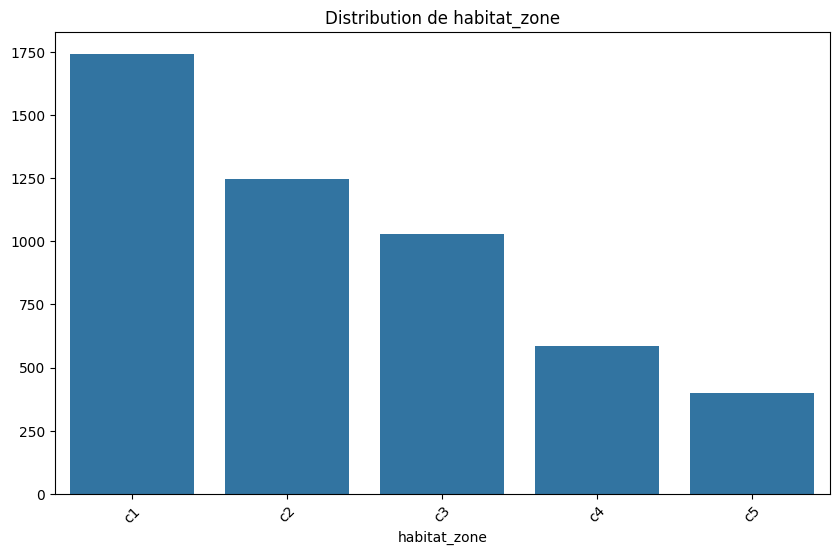

In [66]:
# Code Python
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)

for elem in cat_cols:
    print(f"------------------------{elem}------------------------\n")
    values = df[elem].value_counts()
    figure = plt.figure(figsize=(10, 6))
    sns.barplot(x=values.index, y=values.values)
    plt.title(f"Distribution de {elem}")
    plt.xticks(rotation=45)
    plt.show()



## Données numériques

Index(['thermoreg_reading', 'enzyme_activity_index', 'dual_lobe_signal',
       'stress_variability', 'activity_score', 'fasting_flag',
       'health_outcome'],
      dtype='object')


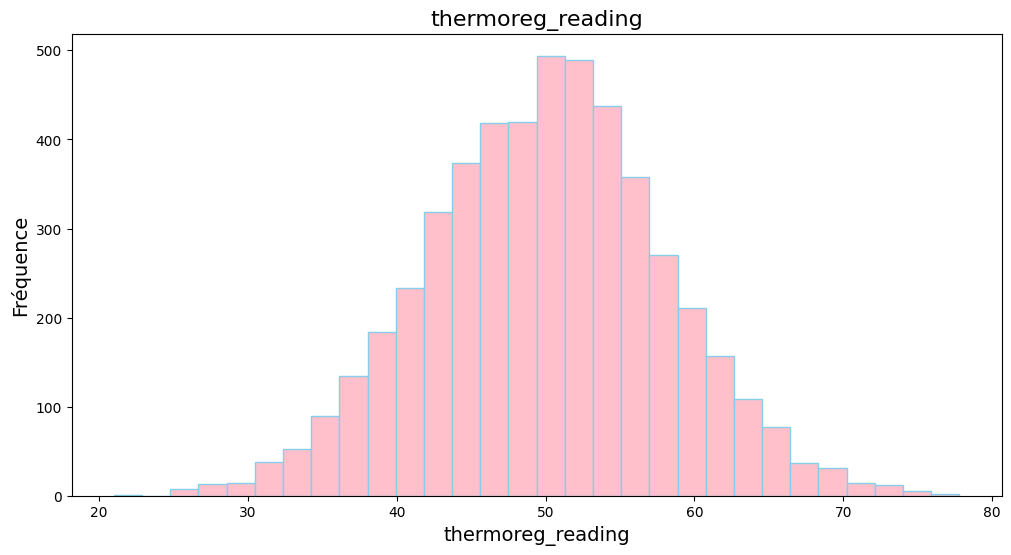

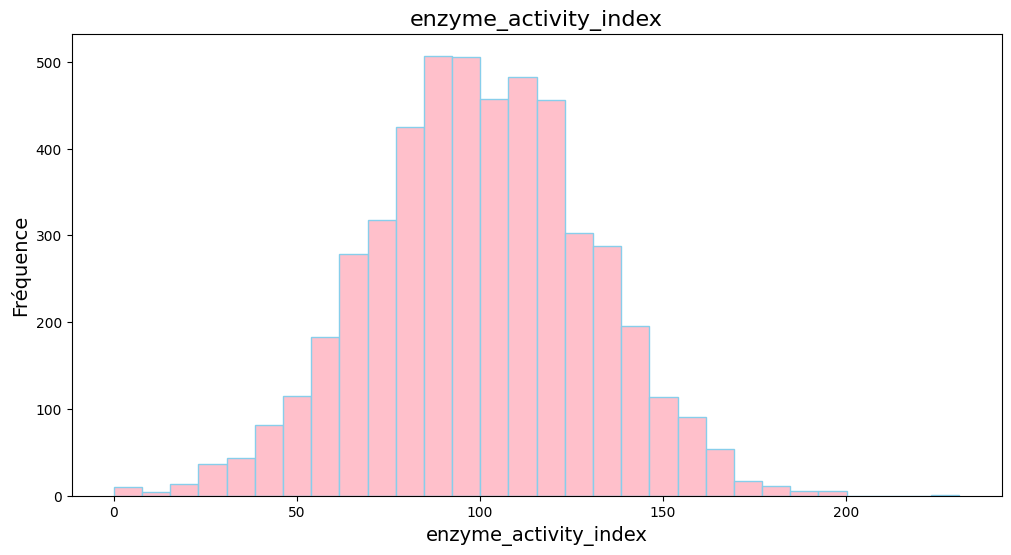

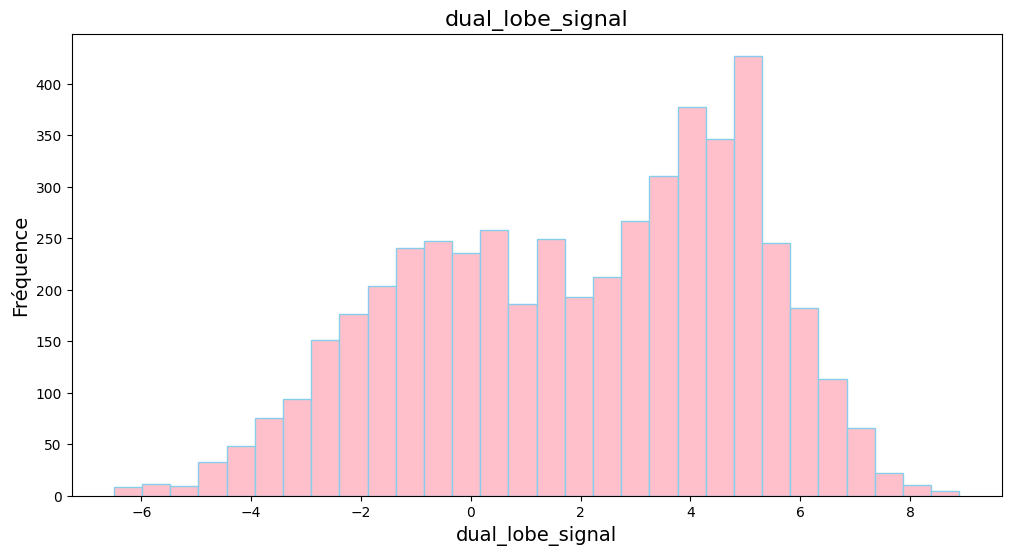

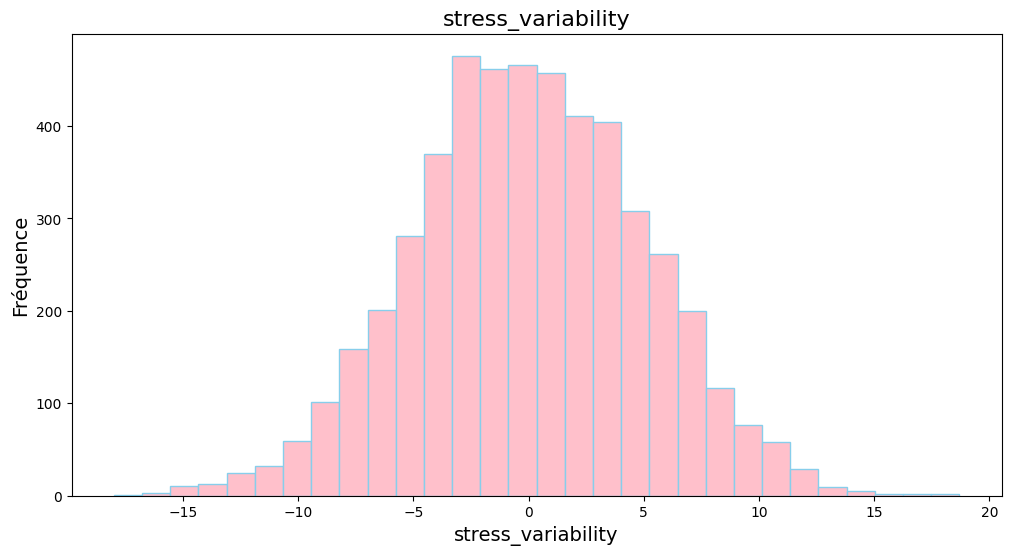

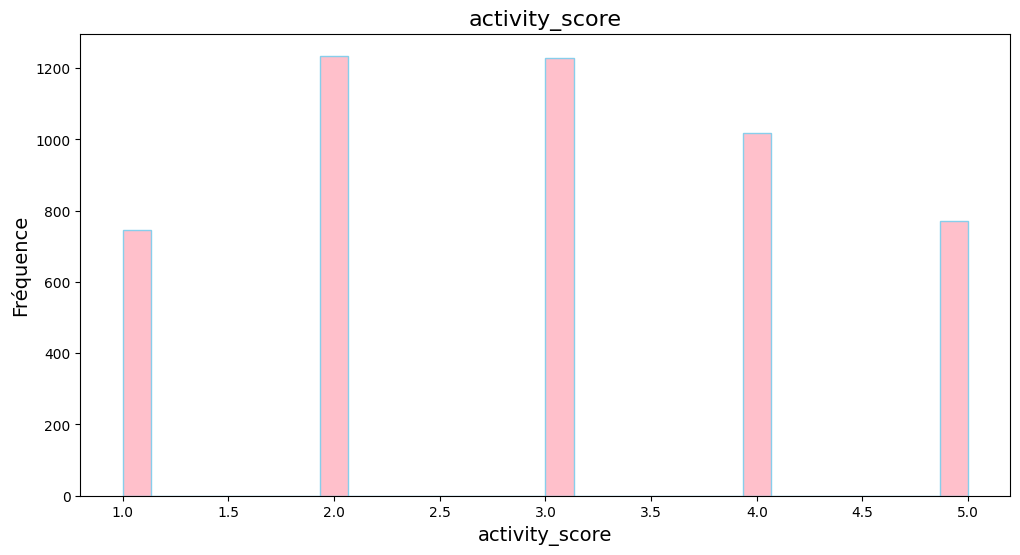

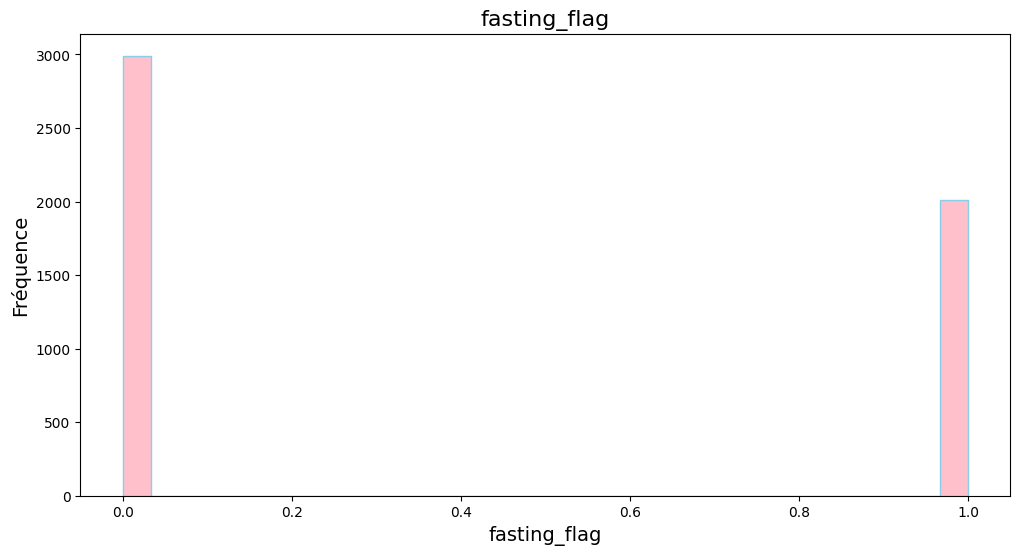

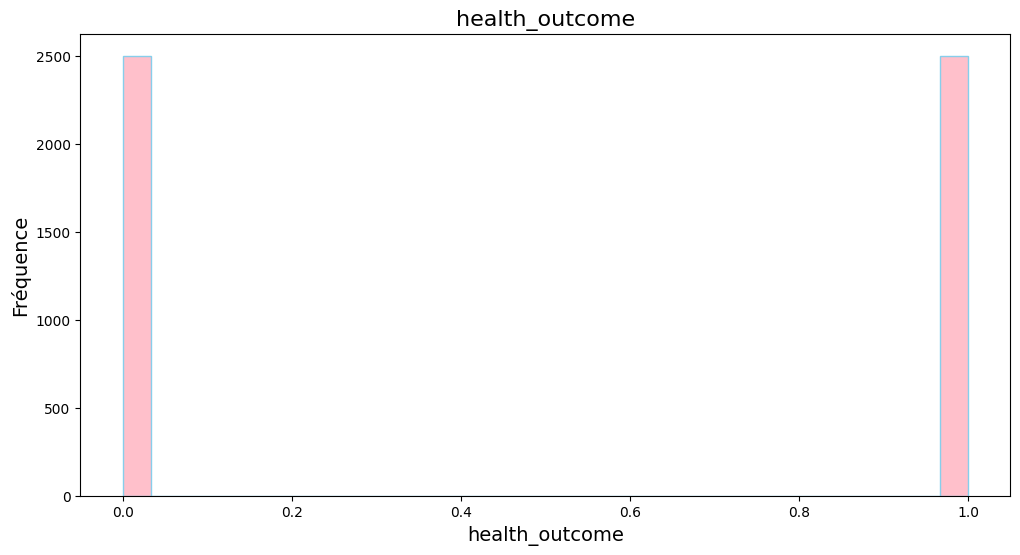

In [67]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns
print(num_col)
for col in num_col:
    plt.figure(figsize=(12, 6))
    df[col].dropna().plot(kind='hist', bins=30, color='pink', edgecolor='skyblue')
    plt.title(col, fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Fréquence', fontsize=14)
    plt.show()


(3) **Données d'entraînement et cible** :

- Pour chaque jeu de données, définir des variables Python, telles que `X` pour les données et `y` pour la classe cible.

In [68]:
# Code Python
y = df['health_outcome']

X = df.drop(columns=['health_outcome'])

In [69]:
print(y.shape)
y.head()

(5000,)


0    1
1    0
2    0
3    1
4    1
Name: health_outcome, dtype: int64

In [70]:
print(X.shape)
X.head()

(5000, 7)


,thermoreg_reading,enzyme_activity_index,dual_lobe_signal,stress_variability,habitat_zone,activity_score,fasting_flag
0,52.6,97.0,3.6,-3.5,c2,2,0
1,41.8,105.0,3.4,10.5,c1,2,0
2,56.2,126.0,5.5,9.6,c2,5,0
3,57.7,106.0,-4.1,-4.0,c1,4,0
4,34.5,73.0,2.3,0.3,c4,5,1


(4) **Division des données** :

- Diviser le jeu de données en ensembles d'entraînement (80%) et de test (20%) en utilisant la méthode de la réserve (*hold out*).

- S'assurer que cette division se produit avant tout prétraitement pour éviter toute fuite de données.

In [71]:
# Code Python
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)   
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

In [72]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 7), (1000, 7), (4000,), (1000,))

In [73]:
X_train.head()

,thermoreg_reading,enzyme_activity_index,dual_lobe_signal,stress_variability,habitat_zone,activity_score,fasting_flag
4227,65.8,115.0,3.3,3.8,c2,1,0
4676,53.2,132.0,-0.0,7.2,c3,3,0
800,43.4,108.0,4.8,-2.2,c2,4,0
3671,54.4,104.0,4.2,2.6,c2,1,0
4193,42.1,69.0,3.6,-8.4,c2,4,1


### Prétraitement des données

(5) **Codage des variables catégorielles** :

- Transformer toutes les variables catégoriques en utilisant des techniques de codage appropriées disponibles dans [sklearn.preprocessing](https://scikit-learn.org/stable/api/sklearn.preprocessing.html). Pour plus de conseils, consultez la section [Prétraitement des Données](https://scikit-learn.org/stable/modules/preprocessing.html) du guide de l'utilisateur. Fournir une justification pour la méthode de codage sélectionnée.

In [ ]:
# Code Python
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat = X_train.select_dtypes(include=['object']).columns
print(cat)



Index(['habitat_zone'], dtype='object')


(6) **Normalisation/standardisation des attributs numériques** :

- Normaliser ou standardiser les attributs numériques si nécessaire. Décrire la technique utilisée (par exemple, échelle Min-Max, StandardScaler) et expliquer pourquoi elle convient à ce jeu de données.

- S'assurer que cette technique est appliquée uniquement aux données d'entraînement, avec la même transformation appliquée ultérieurement aux données de test sans l'ajuster sur elles.

In [75]:
# Code Python

### Développement et évaluation du modèle

(7) **Développement de modèles** :

- Implémenter les modèles d'apprentissage automatique couverts en classe : K-Nearest Neighbors (KNN), Arbres de Décision, et Régression Logistique, ainsi que la Forêt Aléatoire. Utiliser les paramètres par défaut de scikit-learn comme base pour l'entraînement de chaque modèle.

In [76]:
# Code Python

(8) **Évaluation des modèles** :

- Utiliser la validation croisée pour évaluer chaque modèle, en justifiant votre choix du nombre de plis.

- Évaluer les modèles en utilisant des métriques telles que la précision, le rappel, et le score F1.

In [77]:
# Code Python

### Optimisation des hyperparamètres

(9) **Exploration et évaluation des performances :**

- Étudier l'impact de la variation des valeurs des hyperparamètres sur les performances de chaque modèle.

- Pour chaque modèle, s'assurer de faire varier au moins les hyperparamètres suivants :

    - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html):`n_neighbors` et `weights`.

    - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html):`criterion` et `max_depth`.
  
    - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html):`penalty`, `max_iter`, et `tol`.

    - [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html):`n_estimators`, `max_depth`.

- Utiliser une stratégie de recherche en grille ou utiliser les méthodes intégrées de scikit-learn pour évaluer minutieusement toutes les combinaisons de valeurs d'hyperparamètres. La validation croisée doit être utilisée pour évaluer chaque combinaison.

- Quantifier la performance de chaque configuration d'hyperparamètres en utilisant la précision, le rappel, et le score F1 comme métriques. Rapporter à la fois la moyenne et l'écart-type.

- Présenter les résultats sous un format tabulaire ou graphique (par exemple, graphiques en ligne, graphiques à barres) pour démontrer efficacement l'influence des variations d'hyperparamètres sur les performances du modèle.

- Spécifier les valeurs par défaut pour chaque hyperparamètre testé.

- Analyser les résultats et offrir des perspectives sur quelles configurations d'hyperparamètres ont atteint des performances optimales pour chaque modèle.

In [78]:
# Code Python

### Analyse des résultats

(10) **Comparaison des modèles** :

- Comparer les résultats obtenus pour chaque modèle.

- Discuter des différences observées dans les performances des modèles, en fournissant des explications potentielles. Considérer des aspects tels que la complexité du modèle, le déséquilibre des données, le surapprentissage, et l'impact de l'ajustement des paramètres sur les résultats globaux.

- Fournir des recommandations sur le(s) modèle(s) à choisir pour cette tâche et justifier vos choix basés sur les résultats de l'analyse.

- Entraîner le(s) modèle(s) recommandé(s) en utilisant les valeurs de paramètres optimales identifiées lors de l'étape d'optimisation des paramètres. Appliquer ensuite le modèle entraîné aux données de test. Documenter vos observations de manière exhaustive. Évaluer spécifiquement si les résultats dérivés de la validation croisée sont cohérents avec ceux obtenus à partir de l'ensemble de test.

In [79]:
# Code Python

### Gestion des données manquantes

(11) **Évaluer comment les valeurs manquantes affectent les performances du modèle :**

- Lire le fichier CSV avec des données manquantes (`alien_pet_health-realism-clean-missing.csv`).

- Présenter une brève analyse des données manquantes dans le jeu de données en rapportant à la fois le nombre et le pourcentage de valeurs manquantes pour chaque colonne ainsi que pour l'ensemble du jeu de données. Fournir également une répartition du nombre et de la proportion de lignes classées par absence de données manquantes, et celles contenant une, deux ou plus de valeurs manquantes.

- Appliquer une stratégie d'imputation simple (par exemple, médiane pour les numériques, et la plus fréquente pour les catégorielles).

- Standardiser et normaliser les attributs numériques, et encoder les données catégorielles en utilisant les méthodes de prétraitement des données précédemment décrites.

- Utiliser la validation croisée pour évaluer l'efficacité de la stratégie d'imputation des données, étant donné que la combinaison optimale d'algorithmes d'apprentissage et d'hyperparamètres a déjà été déterminée.

- Discuter des différences observées dans les performances.

In [80]:
# Code Python

### Explicabilité du modèle (Optionnel)

L'explicabilité dans l'apprentissage automatique se réfère à la capacité de comprendre et d'interpréter les décisions prises par un modèle. Les valeurs SHAP (SHapley Additive exPlanations) fournissent une mesure unifiée pour expliquer la contribution de chaque attribut à la prédiction du modèle, offrant des perspectives sur comment et pourquoi un modèle fait des prédictions spécifiques, renforçant ainsi la transparence et la confiance dans les modèles complexes.

Cette question est optionnelle. Vous pouvez choisir de l'aborder si vous souhaitez explorer le sujet ou si vous cherchez à obtenir des points supplémentaires.

(12) **Importance des attributs :**

- Avec les hyperparamètres déjà optimisés, calculer les valeurs [SHAP](https://shap.readthedocs.io/en/latest/index.html) (SHapley Additive exPlanations) pour évaluer l'importance des attributs pour les modèles K-Nearest Neighbors (KNN), Arbres de Décision, et Régression Logistique. Pour chaque modèle, produire un graphique récapitulatif qui identifie et met en avant les cinq attributs les plus influents utilisées lors de l'étape de classification.

In [81]:
# Code Python

# Références

# Ressources

Si vous utilisez une assistance IA, il est essentiel de documenter méticuleusement toutes les interactions. Votre rapport doit spécifier les outils et leurs versions, accompagnés d'une transcription complète de ces interactions. La plupart des plateformes d'IA enregistrent automatiquement les conversations, il est donc conseillé de lancer une nouvelle conversation spécifiquement pour le travail et d'utiliser constamment ce fil tout au long de votre travail. Assurez-vous que cette conversation reste exclusivement centrée sur le travail. Inclure la transcription de cette conversation.